<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/MDF/blob/main/MDF_Transporte_de_esp%C3%A9cies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

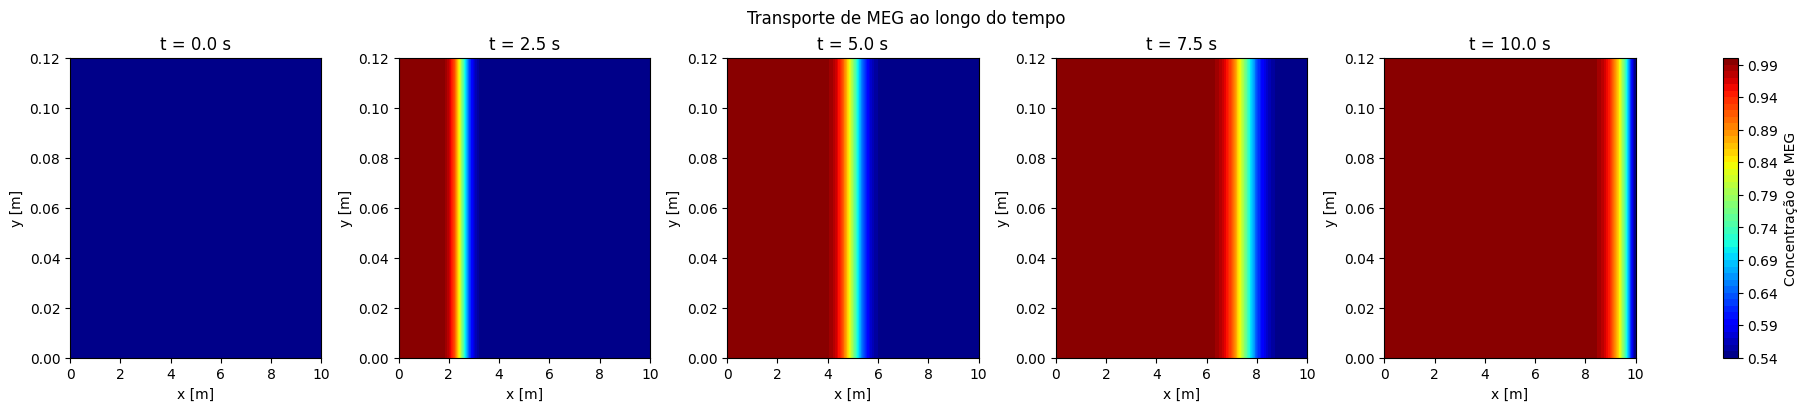

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#domínio e malha
Lx, Ly, Tmax = 10.0, 0.12, 10.0
Nx, Ny, Nt = 200, 20, 500
dx, dy, dt = Lx / (Nx - 1), Ly / (Ny - 1), Tmax / Nt
x, y = np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

D = 7.48e-3 #coeficiente de difusão
v_x = 1.0   # velocidade em x
v_y = 0.0   # velocidade em y

c = np.zeros((Ny, Nx))  #condição inicial

results = []
save_steps = [0, int(0.25 * Nt), int(0.5 * Nt), int(0.75 * Nt), Nt - 1]

for n in range(Nt):
  c_new = c.copy()
  for j in range(1, Ny - 1):
    for i in range(1, Nx - 1):
      adv_x = -v_x * (c[j, i] - c[j, i - 1]) / dx
      adv_y = -v_y * (c[j, i] - c[j - 1, i]) / dy
      diff_x = D * (c[j, i + 1] - 2 * c[j, i] + c[j, i - 1]) / dx**2
      diff_y = D * (c[j + 1, i] - 2 * c[j, i] + c[j - 1, i]) / dy**2
      c_new[j, i] += dt * (adv_x + adv_y + diff_x + diff_y)


  c_new[:, 0] = 1.0 #entrada de MEG
  c_new[:, -1] = c_new[:, -2] #saída (Neumann zero)
  c_new[0, :] = c_new[1, :]  #fronteira inferior (Neumann zero)
  c_new[-1, :] = c_new[-2, :] #fronteira superior (Neumann zero)

  c = c_new.copy()

  if n in save_steps:
    results.append(c.copy())

fig, axes = plt.subplots(1, len(results), figsize=(18, 4), constrained_layout=True)
for idx, ax in enumerate(axes):
    cf = ax.contourf(X, Y, results[idx], levels=50, cmap='jet')
    ax.set_title(f"t = {save_steps[idx]*dt:.1f} s")
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
fig.colorbar(cf, ax=axes.ravel().tolist(), label='Concentração de MEG')
plt.suptitle("Transporte de MEG ao longo do tempo")
plt.show()

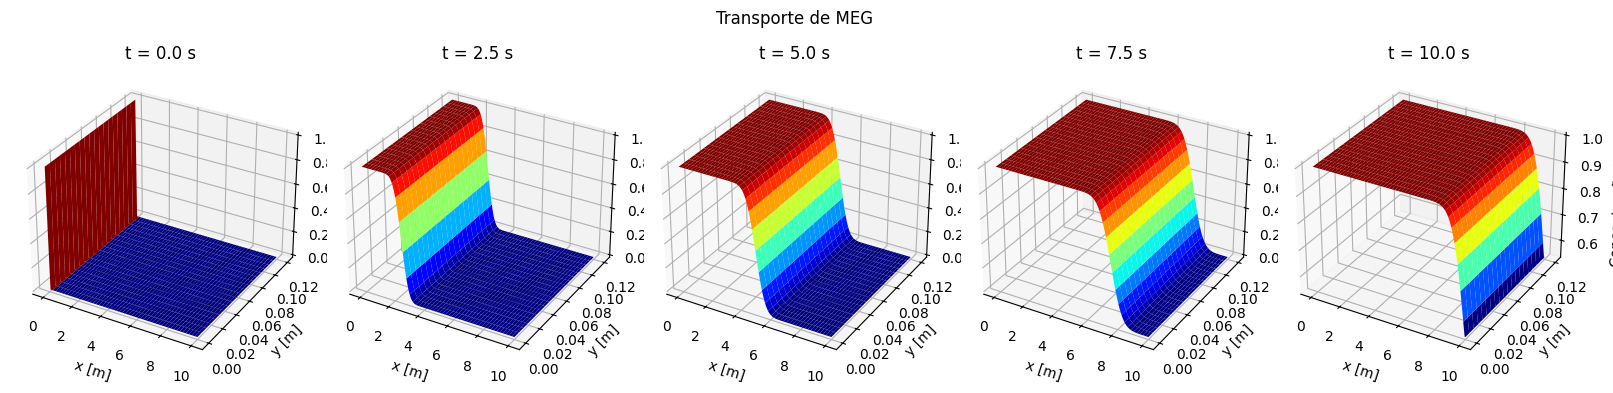

In [11]:
fig = plt.figure(figsize=(16,4))
for idx, c_plot in enumerate(results):
    ax = fig.add_subplot(1, len(results), idx + 1, projection='3d')
    surf = ax.plot_surface(X, Y, c_plot, cmap='jet')
    ax.set_title(f"t = {save_steps[idx]*dt:.1f} s")
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_zlabel("Concentração de MEG")

plt.suptitle("Transporte de MEG")
plt.tight_layout()
plt.show()